EcoForest 0.8

> **0.7的精华版，0.8是一个里程碑，将在其基础上做最后的修改**

- 数据地址：UCI
  - Letter: https://archive.ics.uci.edu/ml/datasets/letter+recognition
- 数据特点：
  - 非常不均衡、缺失值严重、二分类
- 包含内容：
  1. 数据获取
  2. 模型应用
  3. 结果分析

In [1]:
import os
import numpy as np
import pandas as pd
import time
import os.path as osp

In [2]:
import gc 
# del a
gc.collect()

20

# Stage-1：获取数据

In [3]:
import DataHelper
import importlib
from collections import Counter
importlib.reload(DataHelper)

<module 'DataHelper' from 'C:\\Users\\dxeec\\Desktop\\EcoForest-master\\DataHelper.py'>

In [4]:
# X_train,y_train, X_sub, y_sub = DataHelper.get_driver_data()
# X_train,y_train, X_sub, y_sub = DataHelper.get_yeast_data()

In [5]:
X_train,y_train, X_sub, y_sub = DataHelper.get_letter_data()

X.shape: (16000, 16) y.shape: (16000,)
X.shape: (4000, 16) y.shape: (4000,)


In [6]:
Counter(y_train)

Counter({19: 645,
         8: 590,
         3: 638,
         13: 617,
         6: 609,
         18: 587,
         1: 630,
         0: 633,
         9: 599,
         12: 648,
         23: 628,
         14: 614,
         17: 597,
         5: 622,
         2: 594,
         7: 583,
         22: 613,
         11: 604,
         15: 635,
         4: 616,
         21: 628,
         24: 641,
         16: 615,
         20: 645,
         10: 593,
         25: 576})

In [7]:
Counter(y_sub)

Counter({20: 168,
         13: 166,
         21: 136,
         8: 165,
         7: 151,
         4: 152,
         24: 145,
         6: 164,
         1: 136,
         11: 157,
         12: 144,
         3: 167,
         17: 161,
         15: 168,
         22: 139,
         16: 168,
         9: 148,
         2: 142,
         19: 151,
         0: 156,
         10: 146,
         18: 161,
         14: 139,
         5: 153,
         25: 158,
         23: 159})

# Stage-2：模型应用

In [8]:
import ModelUtils
import importlib
from collections import Counter
importlib.reload(ModelUtils)

<module 'ModelUtils' from 'C:\\Users\\dxeec\\Desktop\\EcoForest-master\\ModelUtils.py'>

In [9]:
from sklearn import metrics
def acc_metrix_mult(a, p):
#     print(p)
    return "acc", metrics.accuracy_score(a, p)

# DT, RF, GDBT, XGB 算法

In [10]:
ModelUtils.decision_tree(X_train, y_train, X_sub, y_sub, feval=acc_metrix_mult)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [11]:
ModelUtils.random_forest(X_train, y_train, X_sub, y_sub, n_estimators=1000, feval=acc_metrix_mult)

start train: 2019-08-18 20:53:51.409947
start test: 2019-08-18 20:53:54.901327
end test: 2019-08-18 20:53:55.310663


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [12]:
ModelUtils.gdbt_model(X_train, y_train, X_sub, y_sub, n_estimators=200, feval=acc_metrix_mult)

train ('acc', 0.99275000000000002)
test ('acc', 0.9425)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [9]:
ModelUtils.xgb_model(X_train, y_train, X_sub, y_sub, num_class=26, feval=acc_metrix_mult)

{'objective': 'multi:softmax', 'num_class': 26}
[0]	train-acc:0.8155	valid-acc:0.7735
Multiple eval metrics have been passed: 'valid-acc' will be used for early stopping.

Will train until valid-acc hasn't improved in 500 rounds.
[100]	train-acc:1	valid-acc:0.9605
[200]	train-acc:1	valid-acc:0.96175
[300]	train-acc:1	valid-acc:0.96225
[400]	train-acc:1	valid-acc:0.9625
[500]	train-acc:1	valid-acc:0.9625
[600]	train-acc:1	valid-acc:0.96275
[700]	train-acc:1	valid-acc:0.963
[800]	train-acc:1	valid-acc:0.96325
[900]	train-acc:1	valid-acc:0.96325
[1000]	train-acc:1	valid-acc:0.96275
[1100]	train-acc:1	valid-acc:0.963
[1200]	train-acc:1	valid-acc:0.963
[1300]	train-acc:1	valid-acc:0.9635
[1400]	train-acc:1	valid-acc:0.96325
Stopping. Best iteration:
[924]	train-acc:1	valid-acc:0.96375

train ('acc', 1.0)
test ('acc', 0.96325000000000005)


# BaseLine

In [17]:
ModelUtils.baseline_1_flod(X_train, y_train, X_sub, y_sub, num_class=26, feval=acc_metrix_mult)

X_train.shape, y_train.shape:(16000, 16)(16000,)
X_valid.shape, y_valid.shape:(4000, 16)(4000,)
    cross_score: 0.87621
    test score ('acc', 0.96425000000000005)
train kflod pred: ('acc', 0.96425000000000005)
train pred ('acc', 1.0)
test pred ('acc', 0.96425000000000005)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=1024, verbose=0,
            warm_start=False)

In [27]:
gc.collect()

2347

In [28]:
ModelUtils.baseline_model(X_train, y_train, X_sub, y_sub, num_class=26, feval=acc_metrix_mult)

X_train.shape, y_train.shape:(12789, 16)(12789,)
X_valid.shape, y_valid.shape:(3211, 16)(3211,)
    cross_score: 0.87447
    test score ('acc', 0.96125000000000005)
X_train.shape, y_train.shape:(12795, 16)(12795,)
X_valid.shape, y_valid.shape:(3205, 16)(3205,)
    cross_score: 0.87454
    test score ('acc', 0.96375)
X_train.shape, y_train.shape:(12800, 16)(12800,)
X_valid.shape, y_valid.shape:(3200, 16)(3200,)
    cross_score: 0.87401
    test score ('acc', 0.96099999999999997)
X_train.shape, y_train.shape:(12804, 16)(12804,)
X_valid.shape, y_valid.shape:(3196, 16)(3196,)
    cross_score: 0.86548
    test score ('acc', 0.96074999999999999)
X_train.shape, y_train.shape:(12812, 16)(12812,)
X_valid.shape, y_valid.shape:(3188, 16)(3188,)
    cross_score: 0.86694
    test score ('acc', 0.96225000000000005)
train kflod pred: ('acc', 0.96012500000000001)
train pred ('acc', 1.0)
test pred ('acc', 0.96699999999999997)
lr train ('acc', 0.96118749999999997)
lr test ('acc', 0.96599999999999997)
lr

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_no

# Stage-3：EcoForest

In [12]:
import EnhancedForest_multiclass
import EnhancedForest_producer
import DecomposerForest
import LogUtils
import AlgorithmUtils
import importlib
importlib.reload(DecomposerForest)
importlib.reload(LogUtils)
importlib.reload(EnhancedForest_multiclass)
importlib.reload(EnhancedForest_producer)
importlib.reload(AlgorithmUtils)
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [29]:
decoForest = DecomposerForest.DecomposerForest(X_train, y_train, X_sub, y_sub, num_class=26, flag="letter", isLRStacker=False)
decoForest.set_parameter(criterion="gini", dropout=None, min_samples_leaf=1)
decoForest.fit(n_estimators=1500, kfold=3, feval=acc_metrix_mult)


2018-01-30 13:53:40 layer: 1
all data ('acc', 1.0)
train loss ('acc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.95487500000000003)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.96299999999999997)
pass test loss (0, 0)
pass test loss now (0, 1)
1 [p:0/np:0] 

2018-01-30 13:55:40 layer: 2
all data ('acc', 1.0)
[p:0/1:0|n:16000/1:613] 
train loss ('acc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.955125)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.96325000000000005)
pass test loss (0, 0)
pass test loss now (0, 1)
2 [p:0/np:4000] 

2018-01-30 14:00:34 layer: 3
all data ('acc', 1.0)
[p:0/1:0|n:16000/1:613] 
train loss ('acc', 1.0)
pass train loss (0, 0)
pass train loss now (0, 1)
vaild loss ('acc', 0.95506250000000004)
pass vaild loss (0, 0)
pass vaild loss now (0, 1)
test loss ('acc', 0.96250000000000002)
pass test loss (0, 0)
pass test loss now (0, 1)
not pass

2018-01-30 

KeyboardInterrupt: 

In [24]:
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.95725000000000005,
 [(0, 0.95725000000000005),
  (1, 0.95599999999999996),
  (2, 0.95599999999999996),
  (3, 0.95625000000000004),
  (4, 0.95650000000000002),
  (5, 0.95650000000000002),
  (6, 0.95650000000000002),
  (7, 0.95725000000000005),
  (8, 0.95650000000000002),
  (9, 0.95625000000000004)])

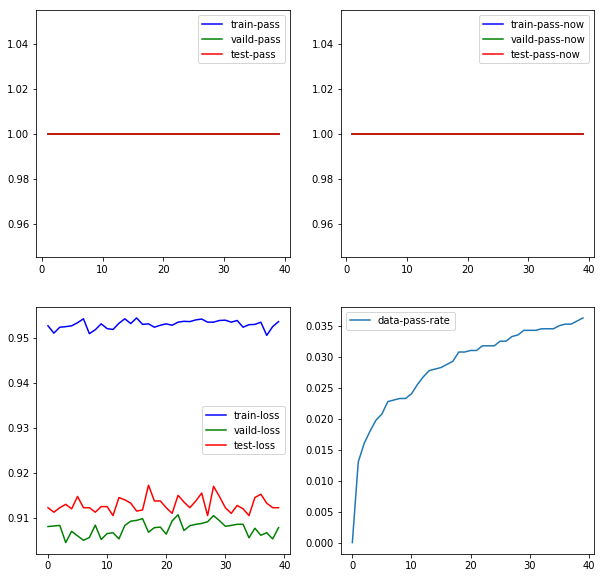

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [256]:
pass_train_x_list = decoForest.enhancedDTree.pass_data_x_list
pass_train_y_list = decoForest.enhancedDTree.pass_data_y_list
pass_test_x_list = decoForest.enhancedDTree.pass_data_test_list
pass_test_y_list = decoForest.enhancedDTree.pass_real_test_list

In [257]:
producerForest = EnhancedForest_producer.Producer(pass_train_x_list, pass_train_y_list, pass_test_x_list, pass_test_y_list)
producerForest.prodect(26, acc_metrix_mult)

decision_tree
train ('acc', 1.0)
test ('acc', 0.97777777777777775)
random_forest
train ('acc', 1.0)
test ('acc', 0.97777777777777775)
baseline_1_flod
X_train.shape, y_train.shape:(667, 16)(667,)
X_valid.shape, y_valid.shape:(180, 16)(180,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.96707
    test score ('acc', 0.97777777777777775)
train kflod pred: ('acc', 0.97777777777777775)
train pred ('acc', 1.0)
test pred ('acc', 0.97777777777777775)
baseline_model
--rxz: delete data 550
--rxz: delete data 551
--rxz: delete data 551
X_train.shape, y_train.shape:(530, 16)(530,)
X_valid.shape, y_valid.shape:(134, 16)(134,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.95504
    test score ('acc', 0.96666666666666667)
X_train.shape, y_train.shape:(531, 16)(531,)
X_valid.shape, y_valid.shape:(133, 16)(133,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.97163
    test score ('acc', 0.96666666666666667)
X_train.shape, y_train.shape:(530, 16)(530,)
X_valid.shape, y_valid.shape:(134, 16)(134,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.96409
    test score ('acc', 0.97222222222222221)
X_train.shape, y_train.shape:(531, 16)(531,)
X_valid.shape, y_valid.shape:(133, 16)(133,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94403
    test score ('acc', 0.96666666666666667)
X_train.shape, y_train.shape:(534, 16)(534,)
X_valid.shape, y_valid.shape:(130, 16)(130,)


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94898
    test score ('acc', 0.97222222222222221)
train kflod pred: ('acc', 0.98493975903614461)
train pred ('acc', 1.0)
test pred ('acc', 0.97222222222222221)
lr train ('acc', 0.9743975903614458)
lr test ('acc', 0.96666666666666667)
lr coef_ -0.246673830905


In [161]:
producerForest.train_x.shape

(319, 16)

In [217]:
Counter(producerForest.train_y)

Counter({0: 239, 3: 1, 8: 7, 9: 8, 11: 64})

In [231]:
tmp = np.array(list(Counter(producerForest.train_y).values()))
tmp

array([239,  64,   8,   7,   1])

In [232]:
tmp2 = np.array(list(Counter(producerForest.train_y).keys()))
tmp2

array([ 0, 11,  9,  8,  3])

In [233]:
len(np.where(tmp == 1)[0]) == 0

False

In [234]:
index_tmp = np.where(tmp == 1)[0]
tmp2[index_tmp]

array([3])

In [239]:
np.where(producerForest.train_y == 3)[0][0]

105

In [236]:
producerForest.train_y[105]

3

In [237]:
producerForest.train_x[105]

array([  2.,   4.,   3.,   3.,   2.,   9.,   6.,   3.,   5.,  10.,   4.,
         6.,   3.,   7.,   2.,   8.], dtype=float32)

In [196]:
producerForest.train_y.shape

(319,)

In [249]:
baseline_model(producerForest.train_x, producerForest.train_y, producerForest.test_x, producerForest.test_y, num_class=26)

X_train.shape, y_train.shape:(319, 16)(319,)
X_train.shape, y_train.shape:(318, 16)(318,)
[0, 3, 8, 9, 11]
X_train.shape, y_train.shape:(287, 16)(287,)
X_valid.shape, y_valid.shape:(31, 16)(31,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 1.00000
    test score 0.975609756098
(31,) (31, 4) (31, 4)
X_train.shape, y_train.shape:(286, 16)(286,)
X_valid.shape, y_valid.shape:(32, 16)(32,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.97222
    test score 0.975609756098
(32,) (32, 4) (32, 4)
X_train.shape, y_train.shape:(285, 16)(285,)
X_valid.shape, y_valid.shape:(33, 16)(33,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94872
    test score 0.975609756098
(33,) (33, 4) (33, 4)
X_train.shape, y_train.shape:(285, 16)(285,)
X_valid.shape, y_valid.shape:(33, 16)(33,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94872
    test score 0.975609756098
(33,) (33, 4) (33, 4)
X_train.shape, y_train.shape:(286, 16)(286,)
X_valid.shape, y_valid.shape:(32, 16)(32,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.91111
    test score 0.975609756098
(32,) (32, 4) (32, 4)
X_train.shape, y_train.shape:(288, 16)(288,)
X_valid.shape, y_valid.shape:(30, 16)(30,)
4
    cross_score: 0.96667
    test score 0.975609756098
(30,) (30, 4) (30, 4)
X_train.shape, y_train.shape:(286, 16)(286,)
X_valid.shape, y_valid.shape:(32, 16)(32,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94444
    test score 0.975609756098
(32,) (32, 4) (32, 4)
X_train.shape, y_train.shape:(286, 16)(286,)
X_valid.shape, y_valid.shape:(32, 16)(32,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94444
    test score 0.975609756098
(32,) (32, 4) (32, 4)
X_train.shape, y_train.shape:(286, 16)(286,)
X_valid.shape, y_valid.shape:(32, 16)(32,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.94444
    test score 0.975609756098
(32,) (32, 4) (32, 4)
X_train.shape, y_train.shape:(287, 16)(287,)
X_valid.shape, y_valid.shape:(31, 16)(31,)
4


c:\program files\python36\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


    cross_score: 0.91111
    test score 0.975609756098
(31,) (31, 4) (31, 4)
train kflod pred: 0.996855345912
train pred 1.0
test pred 0.975609756098
lr train 0.993710691824
lr test 0.975609756098
lr coef_ -0.338712920728


[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
             oob_score=False, random_state=1023, verbose=0,
             warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=None, max_features='auto', ma

In [179]:
a = [0, 3, 8, 9, 11]
b = [0, 11, 8, 9]

In [180]:
[a.index(i) for i in b]

[0, 4, 2, 3]

In [121]:
x_index = list(test_index)

In [127]:
x_index

[5,
 7,
 23,
 30,
 35,
 46,
 48,
 54,
 58,
 62,
 65,
 67,
 73,
 74,
 85,
 89,
 95,
 99,
 101,
 102,
 106,
 109,
 113,
 119,
 125,
 134,
 135,
 137,
 139,
 140,
 141,
 144,
 148,
 152,
 157,
 158,
 165,
 170,
 184]

In [134]:
p_all_fold_prob[:, y_index][x_index] = y_pred_prob

In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
def baseline_model(X_train, y_train, X_sub, y_sub, num_class, feval=metrics.accuracy_score):
    kfold = 10
    X = X_train.copy()
    y = y_train.copy()
    X_test = X_sub.copy()
    real_y = y_sub.copy()
    max_depth = None
    random_state = 1023
    min_samples_leaf = 1
    criterion = 'entropy'#'gini'
    # criterion = 'gini'#'gini'
    n_estimators = 200

    sss = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=9487)

    print("X_train.shape, y_train.shape:"+str(X.shape)+str(y.shape))
    
    
    tmp1 = np.array(list(Counter(y_train).values()))
    tmp2 = np.array(list(Counter(y_train).keys()))
    index_tmp = np.where(tmp1 == 1)[0]
    for i in index_tmp:
        assert len(index_tmp) > 0
        tmp2_index = i
        data_key = tmp2[tmp2_index]
        tmp_data_index = np.where(producerForest.train_y == data_key)[0][0]
        X = np.delete(X, tmp_data_index, axis=0)
        y = np.delete(y, tmp_data_index, axis=0)
    print("X_train.shape, y_train.shape:"+str(X.shape)+str(y.shape))
        
    p_all_fold = np.zeros(X.shape[0])
    p_all_fold_prob = np.zeros((X.shape[0], len(set(y))))
#     p_all_fold_prob = np.zeros((X.shape[0], num_class))
    p_all_fold_prob_test = np.zeros((X_test.shape[0], len(set(y))))
#     p_all_fold_prob_test = np.zeros((X_test.shape[0], num_class))
    clf_folds = []
    
    ###### 
#     if len(set(y_train)) != num_class:
    y_index = list(set(y_train))
    y_index.sort()
    print(y_index)
        
    
    for i, (train_index, test_index) in enumerate(sss.split(X, y)):
        X_train_bl, X_valid_bl = X[train_index], X[test_index]
        y_train_bl, y_valid_bl = y[train_index], y[test_index]
            
        print("X_train.shape, y_train.shape:"+str(X_train_bl.shape)+str(y_train_bl.shape))
        print("X_valid.shape, y_valid.shape:"+str(X_valid_bl.shape)+str(y_valid_bl.shape))
            
        clf = RandomForestClassifier(max_depth=max_depth, random_state=random_state, 
                                        min_samples_leaf=min_samples_leaf, n_estimators=n_estimators, n_jobs=-1,
                                             #max_leaf_nodes=100,
        #                                  n_estimators=2, n_jobs=8, oob_score=True, verbose=1, boostrap=False,
                                         criterion=criterion)
        print(len(set(y_train_bl)))
        clf = clf.fit(X_train_bl, y_train_bl)
        clf_folds.append(clf)
        # print(clf)
        
        cross_score = cross_val_score(clf, X_valid_bl, y_valid_bl, cv=3)
        print("    cross_score: %.5f" % (cross_score.mean()))
        print("    test score", feval(real_y, clf.predict(X_test)))
        
        
#         if len(set(y_train_bl)) < len(set(y_train)):
#             tmp1 = np.array(list(Counter(y_train).values()))
#             tmp2 = np.array(list(Counter(y_train).keys()))
#             index_tmp = np.where(tmp1 == 1)[0]
#             assert len(index_tmp) > 0
#             add_x = []
#             add_y = []
#             for i in range(len(index_tmp) == 0):
#                 data_key = tmp2[index_tmp]
#                 tmp_data_index = np.where(producerForest.train_y == data_key)[0][0]
#                 add_x.append(X_train[tmp_data_index])
#                 add_y.append(y_train[tmp_data_index])
                
        
        
        if not num_class:
            y_pred = clf.predict_proba(X_valid_bl)[:,1]
        else:
            y_pred = clf.predict(X_valid_bl)
            y_pred_prob = clf.predict_proba(X_valid_bl)
            y_pred_prob_test = clf.predict_proba(X_test)
            
#             if len(set(y_train_bl)) < len(set(y_train)):
#                 y_index_fold = list(set(y_train_bl))
#                 y_index_fold.sort()
# #                 print(y_index, y_index_fold)
#                 y_fold_index = [y_index.index(i) for i in y_index_fold]
#             else:
#                 y_fold_index = list(range(len(y_index)))
                

        p_all_fold[test_index] += y_pred
#         p_all_fold_prob[:, y_index][test_index] += y_pred_prob
#         p_all_fold_prob_test[:, y_index] += y_pred_prob_test/kfold
#         p_all_fold_prob[:, y_fold_index][test_index] += y_pred_prob
#         p_all_fold_prob_test[:, y_fold_index] += y_pred_prob_test/kfold
        print(test_index.shape, y_pred_prob.shape, p_all_fold_prob[test_index, :].shape)
        p_all_fold_prob[test_index, :] += y_pred_prob
        p_all_fold_prob_test[:, :] += y_pred_prob_test/kfold
    print("train kflod pred:", feval(y, p_all_fold))

    #### train pred
    y_preds = np.zeros((X.shape[0], len(clf_folds)))
    for i, clf in enumerate(clf_folds):
        if not num_class:
            y_pred = clf.predict_proba(X)[:,1]
        else:
            y_pred = clf.predict(X)
        y_preds[:, i] = y_pred

    if not num_class:
        result = y_preds.mean(axis=1)
    else:
    #     print(y_preds)
        m = stats.mode(y_preds, axis=1)
        result = np.array([i[0] for i in m[0]])
    print("train pred", feval(y, result))

    #### test pred
    y_preds = np.zeros((X_test.shape[0], len(clf_folds)))
    for i, clf in enumerate(clf_folds):
        if not num_class:
            y_pred = clf.predict_proba(X_test)[:,1]
        else:
            y_pred = clf.predict(X_test)
        y_preds[:, i] = y_pred

    if not num_class:
        result = y_preds.mean(axis=1)
    else:
    #     print(y_preds)
        m = stats.mode(y_preds, axis=1)
        result = np.array([i[0] for i in m[0]])
    # print(result)
    print("test pred", feval(real_y, result))

    ### lr pred
    log_model = LogisticRegression()
    log_model.fit(p_all_fold_prob, y)
    res = log_model.predict(p_all_fold_prob)
    print("lr train", feval(y, res))
    res = log_model.predict(p_all_fold_prob_test)
    print("lr test", feval(real_y, res))
    print("lr coef_", np.mean(log_model.coef_))
    return clf_folds

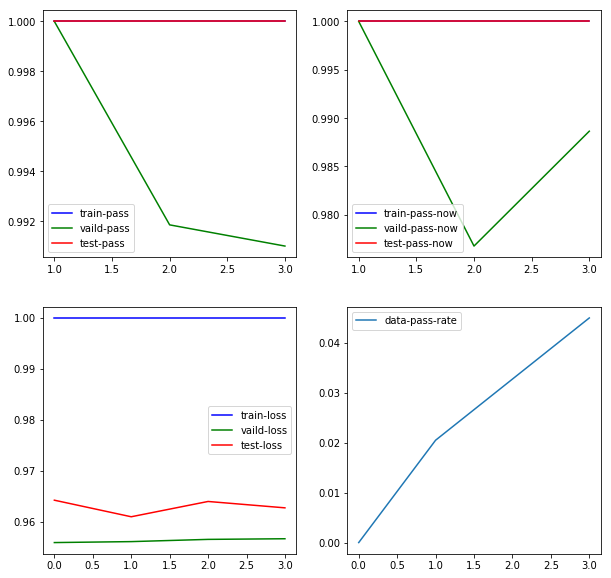

In [258]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

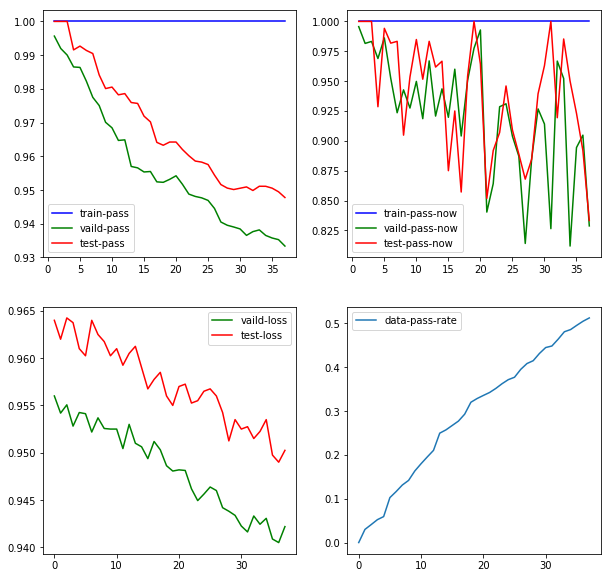

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
x = range(len(decoForest.train_loss_lt))

plt.subplot(221)
plt.plot(x[1:],decoForest.pass_train_loss_lt[1:], label="train-pass", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt[1:], label="vaild-pass", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt[1:], label="test-pass", color="red")
plt.legend()
plt.subplot(222)
plt.plot(x[1:],decoForest.pass_train_loss_lt_now[1:], label="train-pass-now", color="blue")
plt.plot(x[1:],decoForest.pass_vaild_loss_lt_now[1:], label="vaild-pass-now", color="green")
plt.plot(x[1:],decoForest.pass_test_loss_lt_now[1:], label="test-pass-now", color="red")
plt.legend()
plt.subplot(223)
# plt.plot(x,decoForest.train_loss_lt, label="train-loss", color="blue")
plt.plot(x,decoForest.vaild_loss_lt, label="vaild-loss", color="green")
plt.plot(x,decoForest.test_loss_lt, label="test-loss", color="red")
plt.legend()
plt.subplot(224)
plt.plot(x,decoForest.pass_data_rate_lt[:], label="data-pass-rate")
plt.legend()

plt.show()

In [17]:
# n=200, criterion="gini", dropout=None
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96475,
 [(0, 0.96475),
  (1, 0.96274999999999999),
  (2, 0.96475),
  (3, 0.96299999999999997),
  (4, 0.96375)])

In [300]:
# n=50, criterion="gini", dropout=0.8
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96425000000000005,
 [(0, 0.96399999999999997),
  (1, 0.96199999999999997),
  (2, 0.96425000000000005),
  (3, 0.96375),
  (4, 0.96099999999999997),
  (5, 0.96025000000000005),
  (6, 0.96399999999999997),
  (7, 0.96250000000000002),
  (8, 0.96174999999999999),
  (9, 0.96025000000000005),
  (10, 0.96099999999999997),
  (11, 0.95925000000000005),
  (12, 0.96050000000000002),
  (13, 0.96125000000000005),
  (14, 0.95899999999999996),
  (15, 0.95674999999999999),
  (16, 0.95774999999999999),
  (17, 0.95850000000000002),
  (18, 0.95599999999999996),
  (19, 0.95499999999999996),
  (20, 0.95699999999999996),
  (21, 0.95725000000000005),
  (22, 0.95525000000000004),
  (23, 0.95550000000000002),
  (24, 0.95650000000000002),
  (25, 0.95674999999999999),
  (26, 0.95599999999999996),
  (27, 0.95425000000000004),
  (28, 0.95125000000000004),
  (29, 0.95350000000000001),
  (30, 0.95250000000000001),
  (31, 0.95274999999999999),
  (32, 0.95150000000000001),
  (33, 0.95225000000000004),
  (34, 0.95350

In [292]:
# n=50, criterion="gini", dropout=None lift&support
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96525000000000005,
 [(0, 0.96399999999999997),
  (1, 0.96199999999999997),
  (2, 0.96299999999999997),
  (3, 0.96399999999999997),
  (4, 0.96250000000000002),
  (5, 0.96250000000000002),
  (6, 0.96475),
  (7, 0.96199999999999997),
  (8, 0.96299999999999997),
  (9, 0.96425000000000005),
  (10, 0.96375),
  (11, 0.96499999999999997),
  (12, 0.96325000000000005),
  (13, 0.96174999999999999),
  (14, 0.96399999999999997),
  (15, 0.96174999999999999),
  (16, 0.96399999999999997),
  (17, 0.96274999999999999),
  (18, 0.96250000000000002),
  (19, 0.96499999999999997),
  (20, 0.96199999999999997),
  (21, 0.96375),
  (22, 0.96499999999999997),
  (23, 0.96274999999999999),
  (24, 0.96274999999999999),
  (25, 0.96525000000000005)])

In [279]:
# n=50, criterion="gini", dropout=None lift
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96525000000000005,
 [(0, 0.96399999999999997),
  (1, 0.96199999999999997),
  (2, 0.96299999999999997),
  (3, 0.96399999999999997),
  (4, 0.96250000000000002),
  (5, 0.96250000000000002),
  (6, 0.96475),
  (7, 0.96199999999999997),
  (8, 0.96299999999999997),
  (9, 0.96425000000000005),
  (10, 0.96375),
  (11, 0.96499999999999997),
  (12, 0.96325000000000005),
  (13, 0.96174999999999999),
  (14, 0.96399999999999997),
  (15, 0.96174999999999999),
  (16, 0.96399999999999997),
  (17, 0.96274999999999999),
  (18, 0.96250000000000002),
  (19, 0.96499999999999997),
  (20, 0.96199999999999997),
  (21, 0.96375),
  (22, 0.96499999999999997),
  (23, 0.96274999999999999),
  (24, 0.96274999999999999),
  (25, 0.96525000000000005)])

In [275]:
# n=50, criterion="gini", dropout=None
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96525000000000005,
 [(0, 0.96399999999999997),
  (1, 0.96199999999999997),
  (2, 0.96299999999999997),
  (3, 0.96399999999999997),
  (4, 0.96250000000000002),
  (5, 0.96250000000000002),
  (6, 0.96475),
  (7, 0.96199999999999997),
  (8, 0.96299999999999997),
  (9, 0.96425000000000005),
  (10, 0.96375),
  (11, 0.96499999999999997),
  (12, 0.96325000000000005),
  (13, 0.96174999999999999),
  (14, 0.96399999999999997),
  (15, 0.96174999999999999),
  (16, 0.96399999999999997),
  (17, 0.96274999999999999),
  (18, 0.96250000000000002),
  (19, 0.96499999999999997),
  (20, 0.96199999999999997),
  (21, 0.96375),
  (22, 0.96499999999999997),
  (23, 0.96274999999999999),
  (24, 0.96274999999999999),
  (25, 0.96525000000000005)])

In [272]:
# n=200, criterion="gini", dropout=None
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96475,
 [(0, 0.96475),
  (1, 0.96375),
  (2, 0.96425000000000005),
  (3, 0.96475),
  (4, 0.96475),
  (5, 0.96475),
  (6, 0.96399999999999997),
  (7, 0.96274999999999999)])

In [246]:
# n=200, criterion="gini", dropout=-1
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96525000000000005,
 [(0, 0.96475),
  (1, 0.96375),
  (2, 0.96399999999999997),
  (3, 0.96475),
  (4, 0.96375),
  (5, 0.96250000000000002),
  (6, 0.96525000000000005),
  (7, 0.96375),
  (8, 0.96325000000000005),
  (9, 0.96325000000000005)])

In [243]:
# n=50, criterion="gini", dropout=-1
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96475,
 [(0, 0.96399999999999997),
  (1, 0.96199999999999997),
  (2, 0.96425000000000005),
  (3, 0.96375),
  (4, 0.96174999999999999),
  (5, 0.96375),
  (6, 0.96475),
  (7, 0.96399999999999997),
  (8, 0.96125000000000005),
  (9, 0.96025000000000005),
  (10, 0.96250000000000002),
  (11, 0.96199999999999997)])

In [106]:
# n=200, criterion="gini", dropout=None
np.max(np.array(decoForest.test_loss_lt)),list(enumerate(decoForest.test_loss_lt) )

(0.96475,
 [(0, 0.96475),
  (1, 0.96274999999999999),
  (2, 0.96475),
  (3, 0.96299999999999997),
  (4, 0.96375)])

# Todo list
- 树结构设计（完成）
- 通过gini对数据分割（完成）
- 全局测试集
- 输出结果集
- 打印信息增加pass data的比例
- 防止过拟合
- 对pass data的进一步处理
- 先进行数据均衡化是不是更快一些